<a href="https://colab.research.google.com/github/MichaelGajhede/BiBi_enzyme_kinetics/blob/main/BiBi_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

From Marangoni, Alejandro G., Enzyme kinetics : A modern approach 2003, Wiley
![picture](https://drive.google.com/uc?id=1WuEcGPH00CQM7L2Eivc4Oed3s5TIFjEj)

In [2]:
#MM 2 substrate sequential ordered rate function
def BiBi(X,  Vmax, Ks_A, K_AB):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B

  Vi = nom/den
  return Vi.flatten()

From Marangoni, Alejandro G., Enzyme kinetics : A modern approach 2003, Wiley
![picture](https://drive.google.com/uc?id=1O0xGxA6dXDYqd7YwHS34M44RhqHXIyII)
Random order sequential reaction

In [3]:
#MM 2 substrate sequential random ordered rate function
def BiBi_random(X,  Vmax, Ks_A, Ks_B, K_AB, K_BA):

  C_A = np.hsplit(X, len(X[0]))[0]
  C_B = np.hsplit(X, len(X[0]))[1]

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + K_BA * C_B + C_A * C_B

  Vi = nom/den
  return Vi.flatten()

In [4]:
import csv

def write_meshgrid_to_csv(x, y, z, filename):
    from google.colab import drive
    drive.mount('/content/drive')
    # Open the CSV file for writing
    with open('/content/drive/MyDrive/' + filename, 'w', newline='') as csvfile:
        # Create the CSV writer object
        writer = csv.writer(csvfile)

        # Write the header row
        writer.writerow(['x', 'y', 'v'])
        print(z)

        # Write the gridmesh data
        for i in range(len(x)):
            writer.writerow([x[i], y[i], z[i]])


In [21]:
#Import pandas library
import pandas as pd

# Define a function that takes a file name as an argument
def read_csv_to_df(file_name):
  csv = '/content/drive/MyDrive/' + file_name
  # Read the csv file using pandas.read_csv
  df = pd.read_csv(csv)
  # Return the dataframe
  return df


In [23]:
my_df = read_csv_to_df("meshgrid.csv")
# Print the dataframe
my_df


,x,y,v
0,10.0,20.0,1.037883
1,48.0,20.0,2.452002
2,86.0,20.0,2.603832
3,124.0,20.0,2.684164
4,162.0,20.0,2.973168
5,200.0,20.0,2.674274
6,10.0,196.0,7.247335
7,48.0,196.0,15.249270
8,86.0,196.0,15.752352
9,124.0,196.0,16.226369


In [26]:
def reshape_df_to_df(df):
  # Get the number of unique values for x and y
  x_num = len(df['x'].unique())
  y_num = len(df['y'].unique())
  # Reshape the z column into a 2D array
  z = df['v'].values.reshape((x_num, y_num))
  # Create a new dataframe with x and y as index and columns
  new_df = pd.DataFrame(z, index=df['x'].unique(), columns=df['y'].unique())
  # Return the new dataframe
  return new_df


In [27]:
my_df2 = reshape_df_to_df(my_df)
# Print the new dataframe
my_df2

,20.0,196.0,372.0,548.0,724.0,900.0
10.0,1.037883,2.452002,2.603832,2.684164,2.973168,2.674274
48.0,7.247335,15.249270,15.752352,16.226369,17.085410,18.116517
86.0,13.454919,22.066937,22.326161,20.288954,23.573863,25.288526
124.0,15.662397,22.659877,25.861308,25.476820,25.196389,27.567868
162.0,17.768550,28.787310,25.736955,28.129287,27.029627,28.988280
200.0,22.065554,25.576420,28.708223,27.834468,26.316924,29.590310


In [11]:
# Reproduce the model from Lotta et al, 1995, Biochemistry, 34, 4201-4210 and and noise to simulate experimental data
x_SAM = np.linspace(10, 200, 6)
x_NAS = np.linspace(20, 900, 6)

X,Y = np.meshgrid(x_SAM, x_NAS)


xdata = np.column_stack((X.flatten(), Y.flatten()))

Vmax = 37
Ks_A = 23
K_AB = 207


v = BiBi(xdata,  Vmax, Ks_A, K_AB)


noise = np.random.normal(0, .05*v, len(v))
v1 = v + noise

write_meshgrid_to_csv(X.flatten(),Y.flatten(), v1, 'meshgrid.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[ 1.03788314  2.45200189  2.60383205  2.68416398  2.9731684   2.67427416
  7.24733549 15.24926962 15.75235241 16.22636892 17.08541017 18.11651702
 13.45491941 22.06693661 22.32616106 20.28895412 23.57386348 25.28852565
 15.66239679 22.65987677 25.8613079  25.47682    25.19638896 27.56786803
 17.76854994 28.78731012 25.73695539 28.12928728 27.02962741 28.98827954
 22.06555433 25.57641954 28.70822258 27.83446782 26.31692383 29.59031033]


In [12]:
# Import curve_fit from scipy.optimize and determine parameters from the noised data
import os
from scipy.optimize import curve_fit

popt, pcov = curve_fit(BiBi, xdata, v1)
variance = [pcov[0][0], pcov[1][1], pcov[2][2]]
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})
print('Model parameters: ', popt)
print('ESD             : ', np.sqrt(variance))
print('Overfit estimate: ', np.linalg.cond(pcov))

Model parameters:  [22.7 -19.0 57.5]
ESD             :  [1.8 5.5 31.6]
Overfit estimate:  534.0651656534956


In [ ]:
#MM 2 substrate sequential ordered function plotting version
def BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB):

  C_A = X
  C_B = Y

  nom = C_A * C_B * Vmax
  den = Ks_A * K_AB + K_AB * C_A + C_A * C_B
  Vi = nom/den

  return Vi

In [ ]:
# Import libraries for plotting and plot velocities from Lotta paper
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

In [ ]:
# Plot data with noise

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

noise = np.random.normal(0, 0.05*Z, (len(Z),len(Z)))


Z = Z + noise

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model noise added')
plt.show()

In [ ]:
# Plot velocities from curve_fit determined parameters

# Create a 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_SAM, x_NAS)

Vmax = 36
Ks_A = 21
K_AB = 197


Z = BiBi_mesh(X,Y,  Vmax, Ks_A, K_AB)

# Plot the surface plot
ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)
ax.set_xlabel('SAM')
ax.set_ylabel('NAS')
ax.set_zlabel('v')
plt.title('Surface plot of ASMT BiBi model')
plt.show()

In [ ]:
def GoF(y, y_fit):
# Goodnes if Fit function
  # residual sum of squares
  ss_res = np.sum((y - y_fit) ** 2)

  # total sum of squares
  ss_tot = np.sum((y - np.mean(y)) ** 2)

  # r-squared
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [107]:
# Import pandas library
import pandas as pd

# Define a function that takes a list of file names as input
def read_triplicate_data(filename):
  from google.colab import drive
  drive.mount('/content/drive')
  # Open the CSV file
  file = '/content/drive/MyDrive/' + filename
  open(file, 'r', newline='')

  # Initialize an empty data frame
  #df = pd.DataFrame()
  # Loop through the file names
  df = pd.read_csv(file, sep =';', index_col=0, header=0).T
  # Append the data frame to the main data frame
  # Return the result data frame
  #df.columns = df.iloc[0]
  #df.drop(df.index[5]
  return df

df = read_triplicate_data('BiBi_sequential/ASMT_kin_Shengxiao_11.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
df

,Conc NAS uM,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
SAM uM,NaN,10.000,30.000,60.000,90.000,140.000,200.000
20 uM NAS,20.0,11228.288,17119.923,19296.729,21055.407,11895.005,13966.765
20 uM NAS.1,20.0,12040.330,16757.805,20620.870,18780.919,16845.310,15644.755
20 uM NAS.2,20.0,8582.752,14555.533,17053.834,17653.437,14708.029,11640.564
50 uM NAS,50.0,17614.640,20833.072,25790.601,25376.741,23666.119,17619.612
50 uM NAS.1,50.0,13524.851,20762.411,29879.263,24460.793,31075.033,22263.306
50 uM NAS.2,50.0,13478.905,11344.990,24205.854,30949.483,28661.888,22430.674
100uM SAM,100.0,15265.569,13135.725,22300.527,26239.568,23373.005,18236.755
100uM NAS,100.0,15958.431,19623.494,30298.883,27749.917,29537.660,23273.620
100uM NAS.1,100.0,12199.853,16754.342,31587.883,28361.788,15797.321,21462.071


In [109]:
print(df.columns)
gk = df.groupby(df.columns[0])
gk.first()

Index(['Conc NAS uM', '10 uM SAM', '30 uM SAM', '60 uM SAM', '90 uM SAM',
       '140 uM SAM', '200 uM SAM'],
      dtype='object')


,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS uM,,,,,,
20.0,11228.288,17119.923,19296.729,21055.407,11895.005,13966.765
50.0,17614.640,20833.072,25790.601,25376.741,23666.119,17619.612
100.0,15265.569,13135.725,22300.527,26239.568,23373.005,18236.755
300.0,13222.448,19081.815,14930.426,13224.617,12303.114,17817.459
600.0,10768.710,10456.565,14395.509,14444.306,8220.130,8967.884
900.0,10015.638,11842.641,13185.523,12001.716,9023.573,12548.049


In [110]:
gk.mean()

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS uM,,,,,,
20.0,10617.123333,16144.420333,18990.477667,19163.254333,14482.781333,13750.694667
50.0,14872.798667,17646.824333,26625.239333,26929.005667,27801.013333,20771.197333
100.0,14474.617667,16504.520333,28062.431000,27450.424333,22902.662000,20990.815333
300.0,13745.969667,17287.832000,17683.918667,17659.534333,15572.927667,13682.924000
600.0,11491.104667,12000.782000,14731.907667,10032.767000,9660.699333,9006.065333
900.0,10294.881000,10069.055000,12262.997000,10518.780333,9251.125333,9407.174333


In [111]:
gk.std()

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS uM,,,,,,
20.0,1807.996984,1387.877725,1803.130296,1732.912346,2482.827477,2010.821022
50.0,2374.615376,5457.662981,2927.346628,3511.825547,3778.733989,2730.635566
100.0,2000.232525,3251.091324,5031.404727,1092.348994,6882.234075,2551.286672
300.0,1571.200738,1889.727461,2422.127982,4645.432937,3558.696770,3721.130601
600.0,727.765169,1338.405120,322.121058,4322.504332,3735.269376,1041.221170
900.0,426.616986,1779.030769,1629.695177,1627.667854,1502.226424,2941.509253


In [112]:
# conversion between area and nM/min: Divide area by 22 from standard curve and assay time 15 min

velocities = gk.mean()/22/15
velocities

,10 uM SAM,30 uM SAM,60 uM SAM,90 uM SAM,140 uM SAM,200 uM SAM
Conc NAS uM,,,,,,
20.0,32.173101,48.922486,57.546902,58.070468,43.887216,41.668772
50.0,45.069087,53.475225,80.682543,81.603047,84.245495,62.943022
100.0,43.862478,50.013698,85.037670,83.183104,69.402006,63.608531
300.0,41.654454,52.387370,53.587632,53.513740,47.190690,41.463406
600.0,34.821529,36.366006,44.642144,30.402324,29.274846,27.291107
900.0,31.196609,30.512288,37.160597,31.875092,28.033713,28.506589


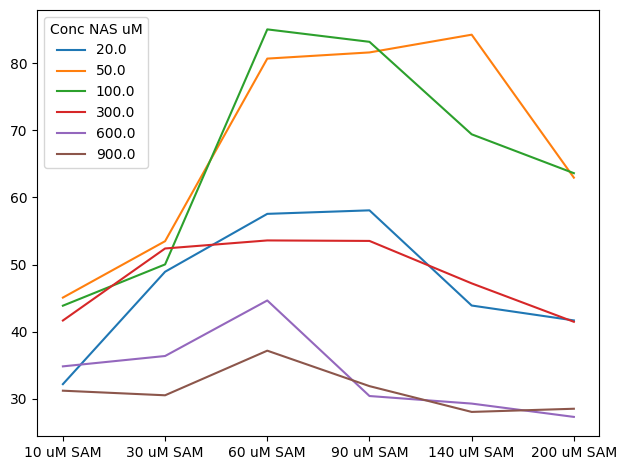

In [113]:
import matplotlib.pyplot as plt
velocities.T.plot()

plt.tight_layout()
plt.show()
